# Gaussian Denoise using Convolution
In this notebook, we use convolution and the convolution theorem to do the Gaussian denoising of an image. We also compare the results with acyclic and circular convolution. we begin by reading and image and adding some artificial noise for testing purposes.

In [1]:
##load cameraman image
import numpy as np
from skimage import data

image = data.camera()
maxValue = image.max()
#image = image.astype(np.float32) #ensure float values

We will simulate noise by adding random values to the image

In [2]:
mean = 0
var = maxValue/2.0
sigma = var**0.5
noise = np.random.normal(mean,sigma,image.shape)
print(noise)

#add the noise
imageNoisy = image + noise

[[ -9.97979452   0.18738788  -6.45558689 ...  -6.52892582   3.14140678
  -10.35526557]
 [  0.94615202  11.62082587  -2.38908599 ... -23.5465828   -8.49554904
  -13.4332509 ]
 [-15.93781212   3.27452148   4.0736471  ...  -1.06629951  10.56484491
   -5.28261822]
 ...
 [  5.36544118  -2.14624637  -7.02948269 ...   3.79735397  -3.64049208
    4.64562188]
 [  5.30500734  -4.53541279  -8.23699135 ...   0.77372645   4.97149973
   -7.15098608]
 [-21.73285786  10.17632353  13.02555518 ...   6.37369838 -17.57757923
   -2.94551768]]


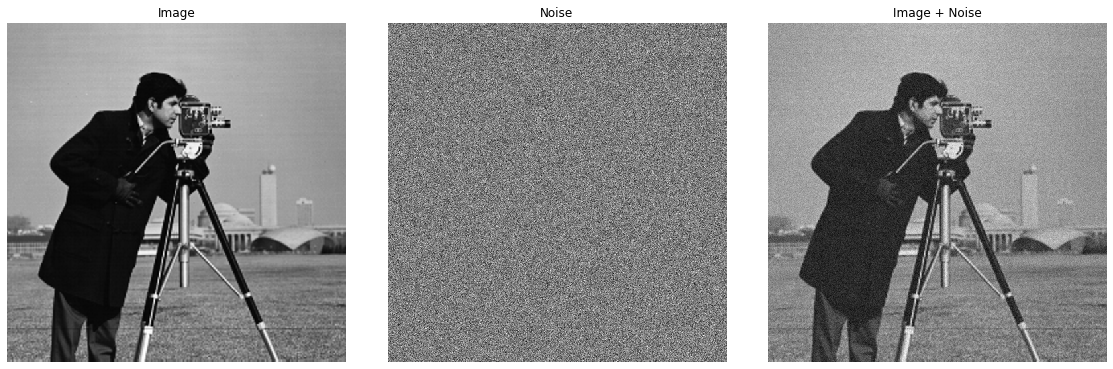

In [3]:
#plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))

plt.gray()
plt.tight_layout()

ax[0].imshow(image, interpolation="nearest")
ax[0].axis('off')
ax[0].set_title('Image')
ax[1].imshow(noise, interpolation="nearest")
ax[1].axis('off')
ax[1].set_title('Noise')
ax[2].imshow(imageNoisy, interpolation="nearest")
ax[2].axis('off')
ax[2].set_title('Image + Noise')

plt.show()

The convolution theorem allows one to efficiently compute the convolution using Fourier space. It is defined as
$$ f(x,y) * g(x,y) = \mathcal{F}^{-1}\left\{F(u,v)\cdot G(u,v)\right\} $$
We take the FFT of the image and shift the orgin to the center. The shifting to the center is for our benefit only, so we can visualise it better. It is a common operation, so there is a built in function for it. We also compute the Hamming window function in 2D and take the FFT of it. We finally compute the convolution and view the results.

In [4]:
import scipy.fftpack as fftpack

#compute the FFT
fftImage = fftpack.fft2(imageNoisy) #2D FFT
#fftImage = fftpack.fftshift(fftImage) #shift to the center of space for viewing
powerSpect = np.abs(fftImage) #compute absolute magnitude

In [5]:
r, c = image.shape
N = r
M = 2
'''windowSize = int(N/M)
highWindow = False
hamming = np.hamming(windowSize)
hamming2DFilter = np.sqrt(np.outer(hamming,hamming))
#invert it to create a high pass window?
value = 0.0
if highWindow:
    hamming2DFilter = 1.0-hamming2DFilter
    value = 1.0
#pad it by M to control the amount of low pass windowing
hamming2DFilter = np.pad(hamming2DFilter, (int(windowSize/2), int(windowSize/2)), mode='constant', constant_values=value)'''

"windowSize = int(N/M)\nhighWindow = False\nhamming = np.hamming(windowSize)\nhamming2DFilter = np.sqrt(np.outer(hamming,hamming))\n#invert it to create a high pass window?\nvalue = 0.0\nif highWindow:\n    hamming2DFilter = 1.0-hamming2DFilter\n    value = 1.0\n#pad it by M to control the amount of low pass windowing\nhamming2DFilter = np.pad(hamming2DFilter, (int(windowSize/2), int(windowSize/2)), mode='constant', constant_values=value)"

In [6]:
#create Gaussian kernel
width = 10
stddev = 2.0/(1.0*width)
x = np.linspace(-1, 1, width)
y = np.linspace(-1, 1, width)
xx, yy = np.meshgrid(x, y)
gaussian = np.exp(-(xx**2 + yy**2)/stddev )

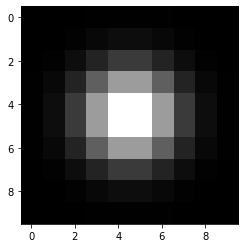

In [7]:
plt.imshow(gaussian)
plt.show()

In [ ]:
#compute the FFT
'''
fftHamming = fftpack.fft2(hamming2DFilter) #2D FFT
#fftHamming = fftpack.fftshift(fftHamming) #shift to the center of space for viewing
powerSpectHamming = np.abs(fftHamming) #compute absolute magnitude
'''

'\nfftHamming = fftpack.fft2(hamming2DFilter) #2D FFT\n#fftHamming = fftpack.fftshift(fftHamming) #shift to the center of space for viewing\npowerSpectHamming = np.abs(fftHamming) #compute absolute magnitude\n'

In [8]:
#pad to original image size
padSize = int((r-width)/2)
gaussian = np.pad(gaussian, padSize, 'constant')
print(gaussian.shape)

#compute the FFT
gaussian = fftpack.fftshift(gaussian) #shift to the center of space for viewing
fftGaussian = fftpack.fft2(gaussian) #2D FFT
#fftGaussian = fftpack.fftshift(fftGaussian) #shift to the center of space for viewing
powerSpectGaussian = np.abs(fftGaussian) #compute absolute magnitude

(512, 512)


In [9]:
import scipy.signal as signal

#compute the convolution
fftImage *= fftGaussian
powerSpectDenoise = np.abs(fftImage) #compute absolute magnitude
#fftImage = fftpack.fftshift(fftImage) #shift to the center of space for viewing
imageDenoise = fftpack.ifft2(fftImage) #2D iFFT
#imageDenoise = fftpack.ifftshift(imageDenoise) #shift to the center of space for viewing

#imageDenoise = signal.fftconvolve(imageNoisy, gaussian, mode='same')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


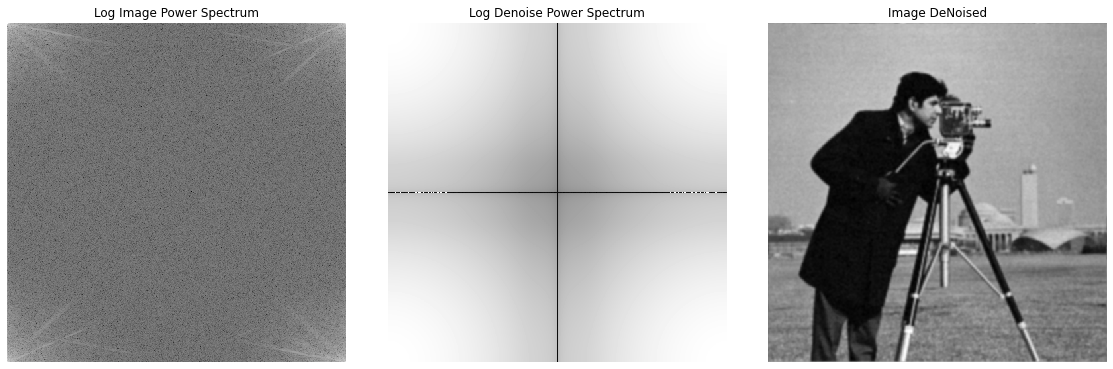

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))

plt.gray()
plt.tight_layout()

ax[0].imshow(np.log10(powerSpect), interpolation="nearest")
ax[0].axis('off')
ax[0].set_title('Log Image Power Spectrum')
ax[1].imshow(np.log10(powerSpectGaussian), interpolation="nearest")
ax[1].axis('off')
ax[1].set_title('Log Denoise Power Spectrum')
ax[2].imshow(np.real(imageDenoise), interpolation="nearest")
ax[2].axis('off')
ax[2].set_title('Image DeNoised')

plt.show()

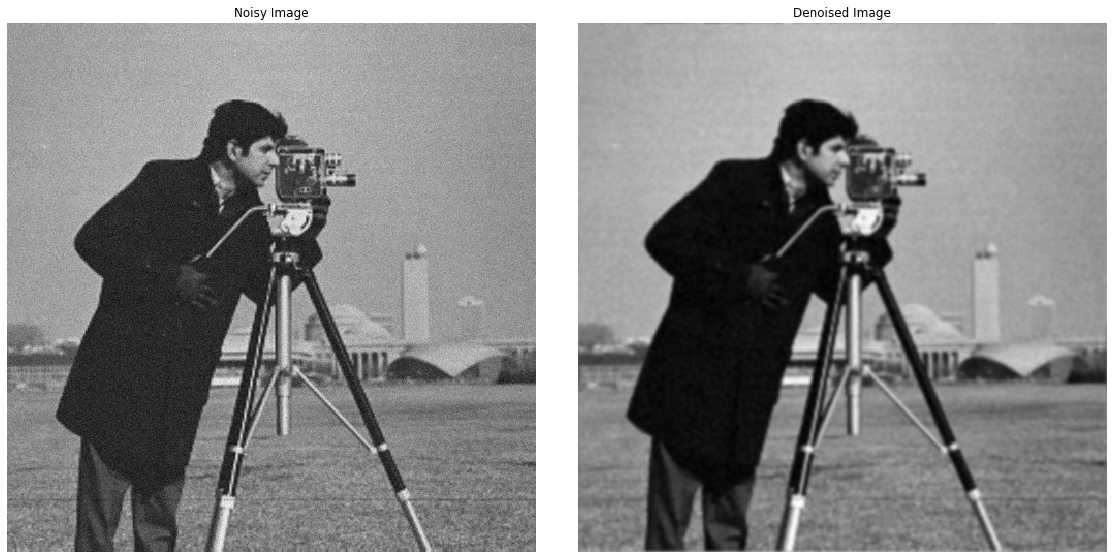

In [11]:
#plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))

plt.gray()
plt.tight_layout()

ax[0].imshow(imageNoisy, interpolation="nearest")
ax[0].axis('off')
ax[0].set_title('Noisy Image')
ax[1].imshow(np.real(imageDenoise), interpolation="nearest")
ax[1].axis('off')
ax[1].set_title('Denoised Image')

plt.show()